Mendownload dataset cats and dogs

Epoch 1/20
1/1 [==============================] - 12s 12s/step - loss: 0.7002 - accuracy: 0.4375 - val_loss: 0.6842 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 128ms/step - loss: 0.6749 - accuracy: 0.8125 - val_loss: 0.6777 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 51ms/step - loss: 0.6748 - accuracy: 0.8750 - val_loss: 0.6718 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 72ms/step - loss: 0.6576 - accuracy: 0.9375 - val_loss: 0.6663 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 58ms/step - loss: 0.6471 - accuracy: 0.8750 - val_loss: 0.6610 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 64ms/step - loss: 0.6392 - accuracy: 0.9375 - val_loss: 0.6560 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 108ms/step - loss: 0.6222 - accuracy: 1.0000 - val_loss: 0.6505 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=========

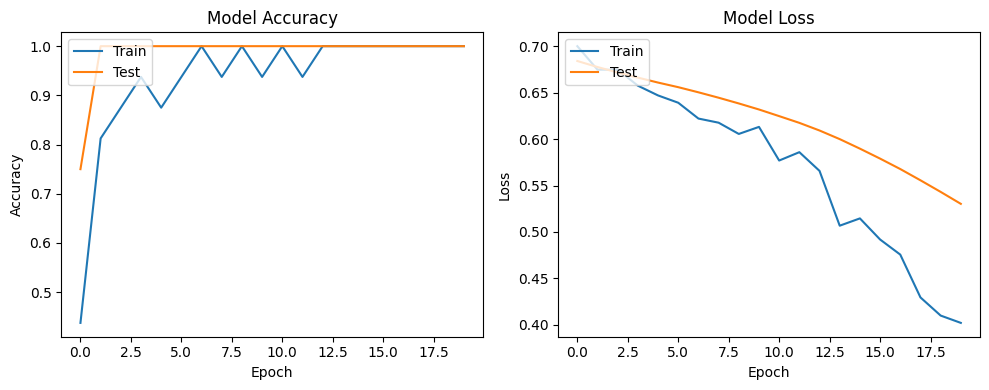

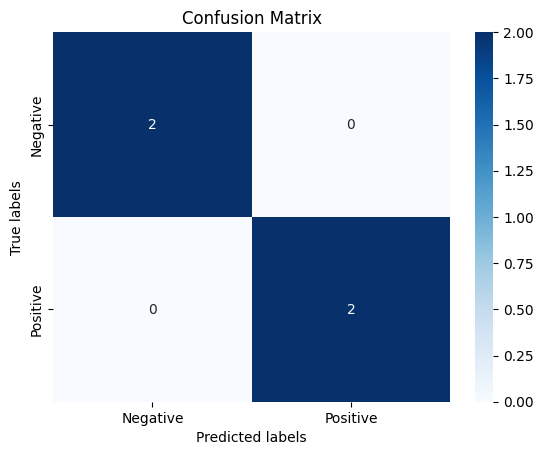

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data produk shope
positive_texts = [
    "Produk sesuai dengan deskripsi, kualitasnya sangat memuaskan.",
    "Harganya sangat bersaing, bahkan lebih murah dibandingkan toko lain.",
    "Produk dengan harga terjangkau namun kualitas tetap bagus.",
    "Pengiriman cepat dan tepat waktu, sangat memuaskan",
    "Barang datang lebih cepat dari perkiraan, sangat baik.",
    "Produk dikemas dengan sangat rapi dan aman, tidak ada kerusakan.",
    "Packing produk sangat bagus, memastikan barang tiba dalam kondisi baik.",
    "Penjual sangat responsif dan membantu saat ada pertanyaan.",
    "Layanan pelanggan Shopee sangat baik, cepat tanggap terhadap keluhan.",
    "Penjual responsif dan ramah."
]

negative_texts = [
    "Kualitas produk tidak sesuai harapan.",
    "Deskripsi tidak akurat, barang berbeda.",
    "Pengiriman sangat lambat.",
    "Packing kurang rapi, barang rusak.",
    "Penjual tidak responsif.",
    "Produk tidak original.",
    "Harga tidak sesuai kualitas.",
    "Barang cacat saat diterima.",
    "Kualitas bahan sangat buruk.",
    "Kemasan terbuka saat diterima.",













]

texts = positive_texts + negative_texts
labels = np.array([1] * len(positive_texts) + [0] * len(negative_texts))

# Tokenisasi teks
max_words = 2000  # Jumlah kata maksimum yang akan dijadikan token
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence agar memiliki panjang yang sama
maxlen = 50  # Panjang sequence
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Membangun model CNN dengan lapisan tambahan dan dropout
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Conv1D(filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
batch_size = 32
epochs = 20  # Jumlah epoch
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot loss dan accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Heatmap confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()